<a href="https://colab.research.google.com/github/abhayschauhan/Data-Analytics-Projects/blob/main/Posture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00405/Postures.zip
!unzip Postures.zip

--2022-12-31 07:01:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00405/Postures.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14660674 (14M) [application/x-httpd-php]
Saving to: ‘Postures.zip.1’

Postures.zip.1      100%[===================>]  13.98M  7.44MB/s    in 1.9s    

2022-12-31 07:01:03 (7.44 MB/s) - ‘Postures.zip.1’ saved [14660674/14660674]

Archive:  Postures.zip
replace Postures.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv("Postures.csv")
print (df.shape)

(78096, 38)


In [3]:
df.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

As per given information any record that contained fewer than 3 markers was removed. The processed data has at most 12 markers per record and at least 3. Let's figure out why they are objects instead of a numerical type. To start with, we can gather the number of unique values:

In [5]:
# Printing all non-numeric values
x = df.columns[11:38]
for i in x:
   print(df[i].unique()[np.char.isnumeric(df[i].unique().astype(str))==False])

['85.2322638852917' '87.4508729469625' '86.8353875680762' ...
 '-30.2256749040353' '26.7159145624784' '53.9653329040079']
['67.7492195028673' '68.4008083028339' '68.9079249764243' ...
 '77.6889105615702' '135.523929259824' '129.602373686175']
['-73.684130041833' '-70.703990925959' '-71.1383441365739' ...
 '-17.3548436885736' '-34.6757739677746' '-43.6796644772844']
['59.1885757027887' '61.5874515532753' '61.6864271910576' ...
 '26.5066400161928' '-22.3294952272238' '-1.55884578727193']
['10.6789364098231' '11.7799190329758' '11.7934398850428' ...
 '135.605902859879' '104.026431451371' '98.0172007250434']
['-71.2977813147725' '-68.827417756239' '-68.88931646056' ...
 '-34.4414628755671' '-54.3346226872107' '3.42181376960772']
['?' '86.8077894267762' '74.7252725037833' ... '61.4753314934401'
 '61.6393864623392' '26.5869101964665']
['?' '72.7012329516761' '48.3061409384314' ... '101.321181459117'
 '101.224661857702' '135.762921713685']
['?' '-71.3733905467759' '-71.5759795802457' ... '-6.

As we can see all other values are numerical apart from '?'. 
Hypothesis- '?' = 0, as no movement was recorded

In [6]:
df[x] = df[x].replace({'?':0})

In [7]:
df[x] = df[x].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  float64
 12  Y3      78096 non-null  float64
 13  Z3      78096 non-null  float64
 14  X4      78096 non-null  float64
 15  Y4      78096 non-null  float64
 16  Z4      78096 non-null  float64
 17  X5      78096 non-null  float64
 18  Y5      78096 non-null  float64
 19  Z5      78096 non-null  float64
 20  X6      78096 non-null  float64
 21  Y6      78096 non-null  float64
 22

In [8]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,...,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,...,-9.535221,16.802004,24.718821,-8.524846,10.154783,13.978967,-5.617378,-0.011788,0.010306,0.000674
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,...,25.321814,33.583751,44.032321,23.820558,26.873506,34.451706,20.805596,1.149634,0.888298,0.393023
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,...,-142.654497,-99.231688,-64.734284,-113.397327,-80.196289,-65.019295,-112.668930,-96.951690,-65.432143,-48.274677
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,...,-7.749800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,...,0.000000,12.497322,37.681613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,...,119.213101,174.054403,167.942588,123.380512,149.486224,168.352478,108.455548,84.683328,127.945490,18.062286


In [9]:
df.Class.unique()

array([0, 1, 2, 3, 4, 5])

<function matplotlib.pyplot.show(*args, **kw)>

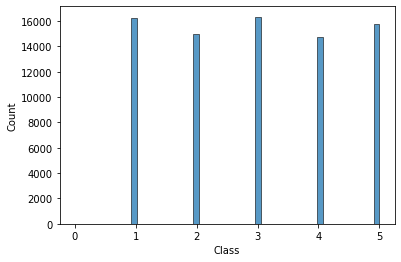

In [10]:
# Checking weather the dataset is Balanced or not
sns.histplot(df.Class)
plt.show

In [11]:
df.Class[df.Class == 0].count()

1

As we can see Class '0' doesnt have any significant value, so we can drop it.

In [12]:
df = df.drop(df.Class[df.Class == 0])

<function matplotlib.pyplot.show(*args, **kw)>

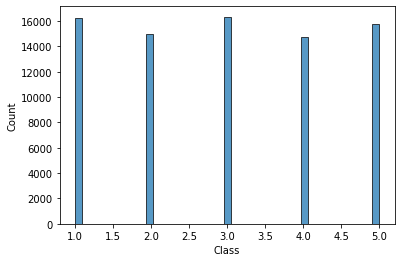

In [13]:
sns.histplot(df.Class)
plt.show
# Dataset is now well balanced

#Outlair Treatment

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,78095.0,2.983776,1.421152,1.000000,2.000000,3.000000,4.000000,5.000000
User,78095.0,7.959229,4.697754,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78095.0,50.346308,32.695886,-108.552738,29.295141,54.620245,72.488833,190.017835
Y0,78095.0,85.813150,40.203448,-98.233756,63.497746,86.526334,113.108673,169.175464
Z0,78095.0,-29.985096,34.361971,-126.770872,-56.356593,-30.864248,-1.419462,113.345119
X1,78095.0,49.595844,32.477961,-111.685241,28.755679,54.215714,71.763080,188.691997
Y1,78095.0,86.193751,40.452297,-96.142589,64.156450,87.543493,116.228881,170.209350
Z1,78095.0,-29.509579,34.764460,-166.006838,-57.360408,-30.185331,-0.368080,104.697852
X2,78095.0,48.612744,33.605155,-106.886524,25.173405,53.814592,71.561988,188.760168
Y2,78095.0,83.772387,41.022710,-100.789312,58.053733,86.459935,106.661720,168.186466


As we can see many columns have outlairs, we'll treat them by resticting the percentile values.

In [15]:
# Treating outlairs using flooring and capping method
for i in df.columns[1:]:
  floor = df[i].quantile(0.1)
  capp = df[i].quantile(0.9)
  df[i] = np.where(df[i] <floor, floor,df[i])
  df[i] = np.where(df[i] >capp, capp,df[i])

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,78095.0,2.983776,1.421152,1.000000,2.000000,3.000000,4.000000,5.000000
User,78095.0,7.863256,4.582155,0.000000,5.000000,9.000000,12.000000,13.000000
X0,78095.0,50.506581,27.336204,4.424083,29.295141,54.620245,72.488833,89.603012
Y0,78095.0,86.645154,35.724316,27.275212,63.497746,86.526334,113.108673,140.035776
Z0,78095.0,-30.262573,29.715222,-74.350156,-56.356593,-30.864248,-1.419462,13.389349
X1,78095.0,49.643331,27.386564,3.055897,28.755679,54.215714,71.763080,88.327719
Y1,78095.0,87.085285,35.863710,25.466279,64.156450,87.543493,116.228881,139.693073
Z1,78095.0,-29.867205,30.595240,-75.101783,-57.360408,-30.185331,-0.368080,14.934733
X2,78095.0,48.435743,28.956031,-1.039327,25.173405,53.814592,71.561988,89.160707
Y2,78095.0,84.444977,36.849239,21.201836,58.053733,86.459935,106.661720,138.471981


# Training

Due to the manner in which data was captured, it is likely that for a given record and user there exists a near duplicate record originating from the same user. Hence we'll split train, test data based of different users.

In [17]:
# Test data includes users upto 11
test = df[df.User>11]
# Train data includes usres 12 & 13
train = df[df.User<12]

In [18]:
x_train, x_test, y_train, y_test = train.drop('Class', axis = 1), test.drop('Class', axis = 1), train.Class, test.Class

len(x_train), len(x_test)

(56996, 21099)

In [19]:
import xgboost as xgb

In [20]:
from sklearn.metrics import accuracy_score

# Initializing classifier
xgb_cl = xgb.XGBClassifier(random_state=15,n_estimators = 1200, max_depth=12,tree_method='gpu_hist', gpu_id=0)

# Fit
xgb_cl.fit(x_train, y_train)




XGBClassifier(gpu_id=0, max_depth=12, n_estimators=1200,
              objective='multi:softprob', random_state=15,
              tree_method='gpu_hist')

In [21]:
preds = xgb_cl.predict(x_test)

In [22]:
accuracy_score(y_test, preds)

0.8306554813024314

AxesSubplot(0.125,0.125;0.62x0.755)


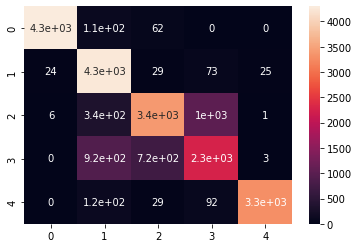

In [23]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, preds) #confusion matrix
print(sns.heatmap(cn, annot=True)) 

[0.01471339 0.02284057 0.02807643 0.02431057 0.00723381 0.01715351
 0.00901144 0.00939982 0.01951782 0.00944047 0.00776712 0.02083242
 0.00747159 0.0068871  0.01998963 0.00815124 0.00708005 0.01358102
 0.01067    0.05408509 0.01469808 0.01960376 0.01031219 0.07357735
 0.00915196 0.02558547 0.18760905 0.01970868 0.00478847 0.15102008
 0.02183615 0.00338202 0.12087146 0.01964213 0.         0.
 0.        ]


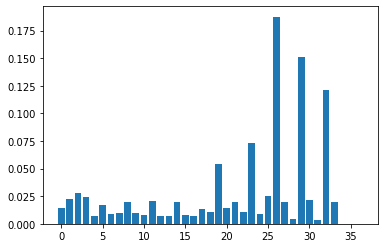

In [24]:
# plot feature importance
print(xgb_cl.feature_importances_)
plt.bar(range(len(xgb_cl.feature_importances_)), xgb_cl.feature_importances_)
plt.show()

From the plot above, we can conclude that sensor 'X8' has maximinum feature importance.